In [34]:
from keras.applications import ResNet50
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
model = ResNet50()

In [36]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [37]:
vars(model.layers[0])

{'_tracker': <keras.src.utils.tracking.Tracker at 0x1e8767fd400>,
 '_self_setattr_tracking': True,
 '_trainable_variables': [],
 '_non_trainable_variables': [],
 '_layers': [],
 '_metrics': [],
 '_seed_generators': [],
 '_lock': False,
 '_auto_config': <keras.src.saving.serialization_lib.SerializableDict at 0x1e876500410>,
 'build': <function keras.src.layers.layer.Layer.build(input_shape)>,
 'quantize': <function keras.src.layers.layer.Layer.quantize(mode, type_check=True)>,
 '_saved_model_inputs_spec': None,
 '_saved_model_arg_spec': None,
 '_tracked': ['_inbound_nodes',
  '_outbound_nodes',
  '_losses',
  '_loss_ids',
  '_losses_override',
  'call_signature_parameters',
  '_call_context_args',
  '_call_has_context_arg'],
 'name': 'input_layer_1',
 '_inbound_nodes': [<Node operation=input_layer_1, id=2097932128720>],
 '_outbound_nodes': [<Node operation=conv1_pad, id=2097932130624>],
 '_dtype_policy': <DTypePolicy "float32">,
 'activity_regularizer': None,
 '_path': None,
 'built': T

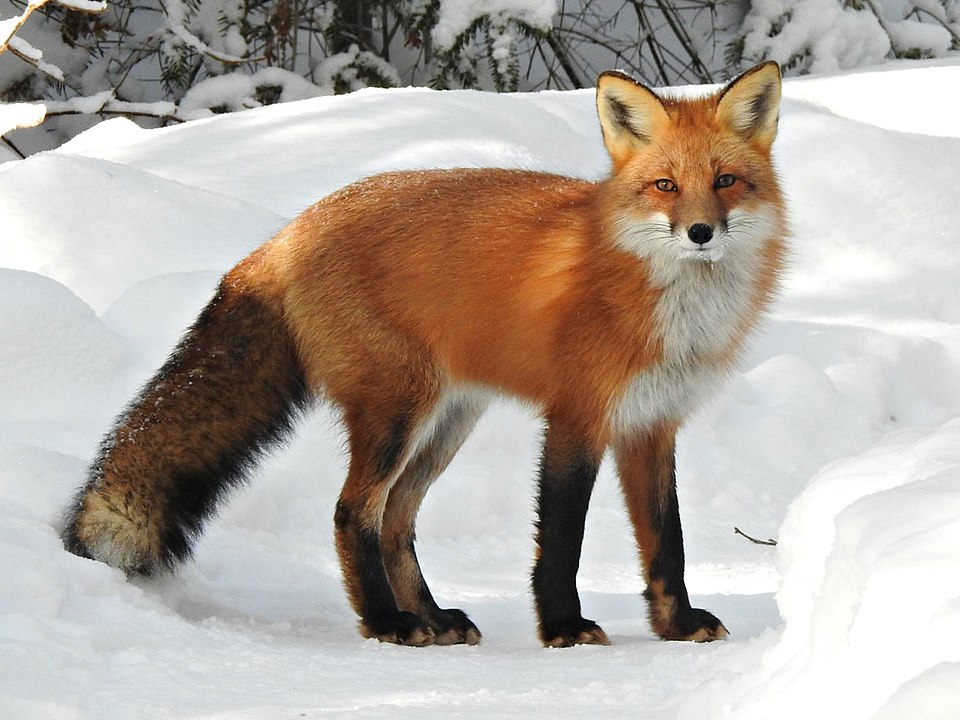

In [38]:
img = load_img('Vulpes_vulpes_ssp_fulvus.jpg')
img

In [39]:
im = img_to_array(img)
im.shape

(720, 960, 3)

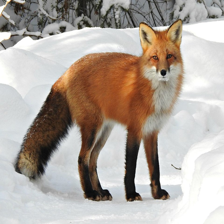

In [40]:
img2 = img.resize((224,224))
img2

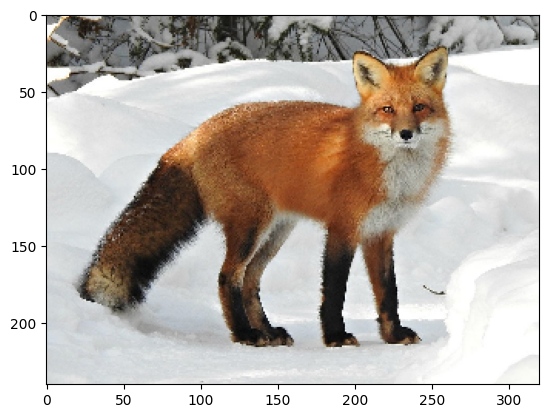

In [41]:
plt.imshow(im[::3,::3,:].astype('uint8')) # پله پله میکنه و خوب نی با همون بالا میریم

In [42]:
im2 = img_to_array(img2)
im2.shape

(224, 224, 3)

In [43]:
p = model.predict(im2.reshape(1,224,224,3))
p

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[3.39833086e-08, 1.18045254e-08, 2.18142073e-08, 1.91837723e-09,
        6.52782584e-09, 3.06703960e-08, 1.98350603e-09, 2.39592701e-08,
        3.21129945e-09, 5.18655696e-08, 1.25143751e-09, 1.35482314e-09,
        4.70834705e-10, 1.18157303e-10, 1.76398292e-08, 3.58831009e-09,
        5.25773602e-09, 6.79889808e-07, 2.39923796e-08, 4.68554084e-09,
        1.06031617e-09, 8.00773350e-08, 5.53675505e-09, 1.25255317e-08,
        2.38160691e-08, 1.00980833e-08, 4.47532589e-09, 2.36265407e-08,
        3.57719188e-09, 2.91057822e-09, 7.39705097e-09, 1.96706806e-09,
        1.73358228e-09, 4.51258630e-09, 4.09700434e-08, 3.70473513e-10,
        8.82714613e-09, 1.69327230e-09, 1.71528203e-09, 6.19772678e-09,
        3.63420383e-09, 4.74361883e-10, 3.88300023e-08, 3.77913967e-09,
        5.16385645e-09, 4.36810410e-09, 2.65852584e-09, 2.06903810e-08,
        2.34666544e-08, 3.20858859e-08, 1.60166195e-07, 5.76690627e-06,
        2.08947402e-08, 9.73556347e-09, 4.63780303e-09, 1.342506

In [44]:
p.shape  # 1000 تعداد کلاس ها

(1, 1000)

In [45]:
res = imagenet_utils.decode_predictions(p)[0][0]
print(f'Result : {res[1]}  ({res[2]*100:.2f}%)')

Result : grey_fox  (44.83%)


In [47]:
im3 = imagenet_utils.preprocess_input(im2.reshape(1,224,224,3))
im3.shape

(1, 224, 224, 3)

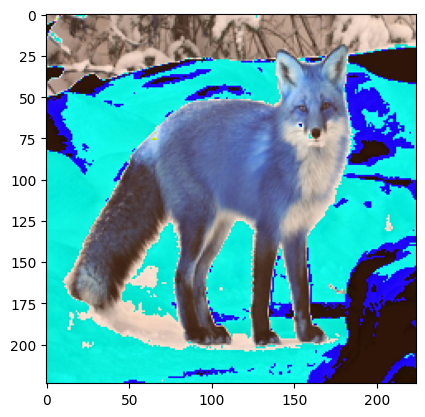

In [50]:
plt.imshow(im3.reshape(224,224,3).astype('uint8'))

In [51]:
p = model.predict(im3.reshape(1,224,224,3))
res = imagenet_utils.decode_predictions(p)[0][0]
print(f'Result : {res[1]}  ({res[2]*100:.2f}%)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Result : red_fox  (88.45%)
